In [300]:
import pandas as pd
def calculate_cross_corelation_coef(x, y):
    """Calculates corelation coef of x and y"""
    n = len(x) # signal x lenght
    avg_x = sum(x) / n
    avg_y = sum(y) / n
    # calculate denominator
    sumx = 0
    sumy = 0
    diffprod=0
    for index, value in enumerate(x):
        xdiff = (x[index] - avg_x)
        ydiff = (y[index] - avg_y)
        diffprod += xdiff * ydiff
        sumx += xdiff * xdiff
        sumy += ydiff * ydiff
    import math
    denominator = math.sqrt(sumx*sumy)
    corr_coef = diffprod / denominator
    # check if our calculated corrcoef
    # is the "same" as the one from numpy
    assert math.isclose(
               corr_coef,
               np.corrcoef(x,y)[0][1])
    return corr_coef

def shift_arrays(x, y, delay):
    """Shifts arrays to left or right."""
    delay = int(delay)
    if delay > 0:
        return x[:-delay], y[delay:]
    if delay < 0:
        return  x[abs(delay):], y[:-abs(delay)]

In [301]:
def analyse_series(x, y, delay=0):
    x_len, y_len = len(x), len(y)
    if x_len != y_len:
        print('Arrays are not equal! Shorter'
              ' one will be filled with 0 at'
              ' the end')
        if x_len > y_len:
            len_diff = x_len - y_len
            for i in enumerate(len_diff):
                y.append(0)
        else:
            len_diff = len_y - len_x
            for i in enumerate(len_diff):
                x.append(0)
    
    if delay != 0:
        x, y = shift_arrays(x, y, delay)
    
    return calculate_cross_corelation_coef(x, y)        
    


In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
btc_df = pd.read_csv('Gdax_BTCUSD_d.csv', header=0)
eth_df = pd.read_csv('Gdax_ETHUSD_d.csv', header=0)


In [303]:
btc_df.columns = ['Date','Symbol','Open','High','Low','Close','Volume From','Volume To']
eth_df.columns = ['Date','Symbol','Open','High','Low','Close','Volume From','Volume To']

In [304]:
btc_df.Date = pd.to_datetime(btc_df.Date)
eth_df.Date = pd.to_datetime(eth_df.Date)

In [305]:
btc_df.set_index('Date', inplace=True)
eth_df.set_index('Date', inplace=True)

In [588]:
btc_df = btc_df.loc[btc_df.index >'2017-07-01']
eth_df = eth_df.loc[eth_df.index >'2017-07-01']
btc_df.info()
eth_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 459 entries, 2018-10-03 to 2017-07-02
Data columns (total 8 columns):
Symbol            459 non-null object
Open              459 non-null float64
High              459 non-null float64
Low               459 non-null float64
Close             459 non-null float64
Volume From       459 non-null float64
Volume To         459 non-null float64
btc_with_noise    459 non-null float64
dtypes: float64(7), object(1)
memory usage: 32.3+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 459 entries, 2018-10-03 to 2017-07-02
Data columns (total 7 columns):
Symbol         459 non-null object
Open           459 non-null float64
High           459 non-null float64
Low            459 non-null float64
Close          459 non-null float64
Volume From    459 non-null float64
Volume To      459 non-null float64
dtypes: float64(6), object(1)
memory usage: 28.7+ KB


Text(0.5, 0, 'Date')

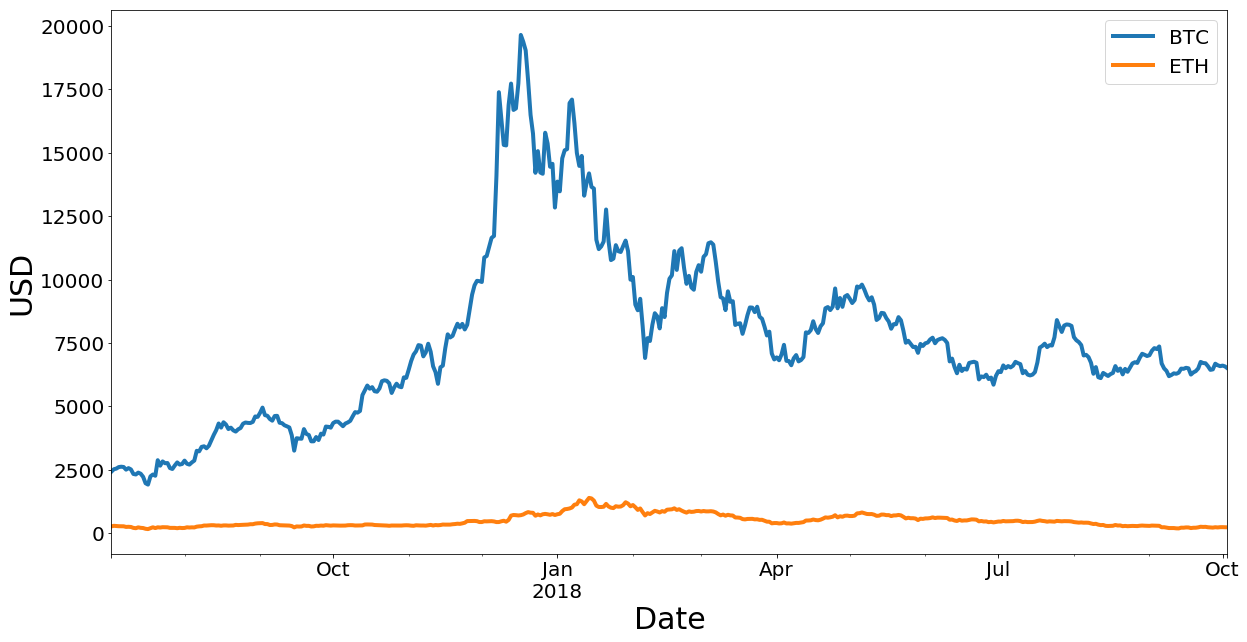

In [606]:
plt.figure(1)
btc_df['Open'].plot(figsize=(20,10), linewidth=4, fontsize=20, label='BTC')
eth_df['Open'].plot(figsize=(20,10), linewidth=4, fontsize=20, label='ETH')
plt.legend(fontsize=20)
plt.ylabel("USD",size=30)
plt.xlabel("Date",size=30)

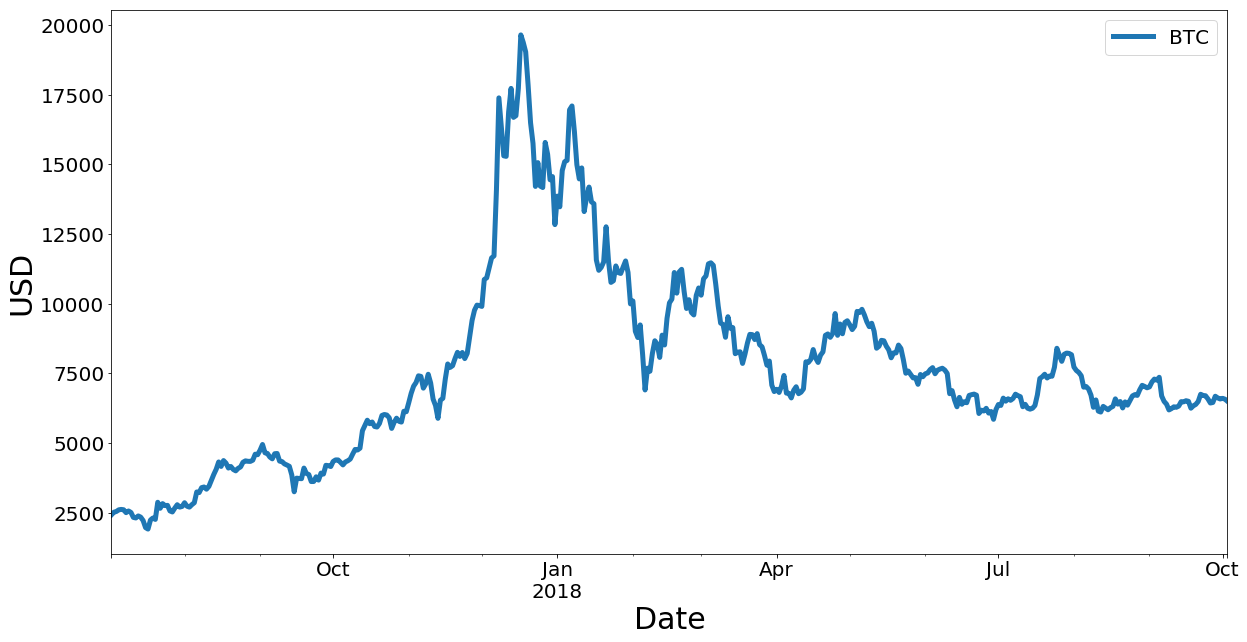

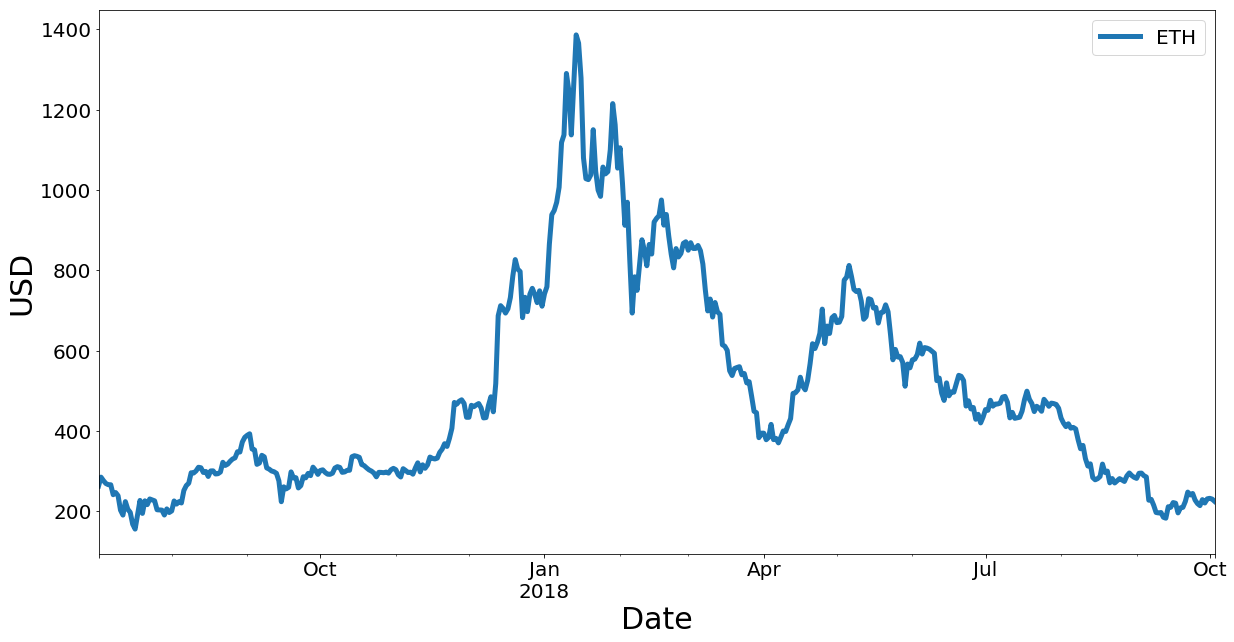

In [607]:
plt.figure(2)
btc_df['Open'].plot(figsize=(20,10), linewidth=5, fontsize=20, label='BTC')
plt.ylabel("USD",size=30)
plt.xlabel("Date",size=30)
plt.legend(fontsize=20)
plt.figure(3)
eth_df['Open'].plot(figsize=(20,10), linewidth=5, fontsize=20, label='ETH')
plt.ylabel("USD",size=30)
plt.xlabel("Date",size=30)
plt.legend(fontsize=20)


In [609]:
x = btc_df['Open'].tolist()
y = eth_df['Open'].tolist()
max_delay = int(len(x)/2)
coef_n_delay = pd.DataFrame(columns=['delay', 'coef'])
for delay in range(-max_delay,max_delay):
    coef_n_delay = coef_n_delay.append(
        {'coef': analyse_series(x,y,delay),
          'delay': delay}, 
        ignore_index=True)
analyse_series(x,y,0)

0.7479525775007457

<Figure size 432x288 with 0 Axes>

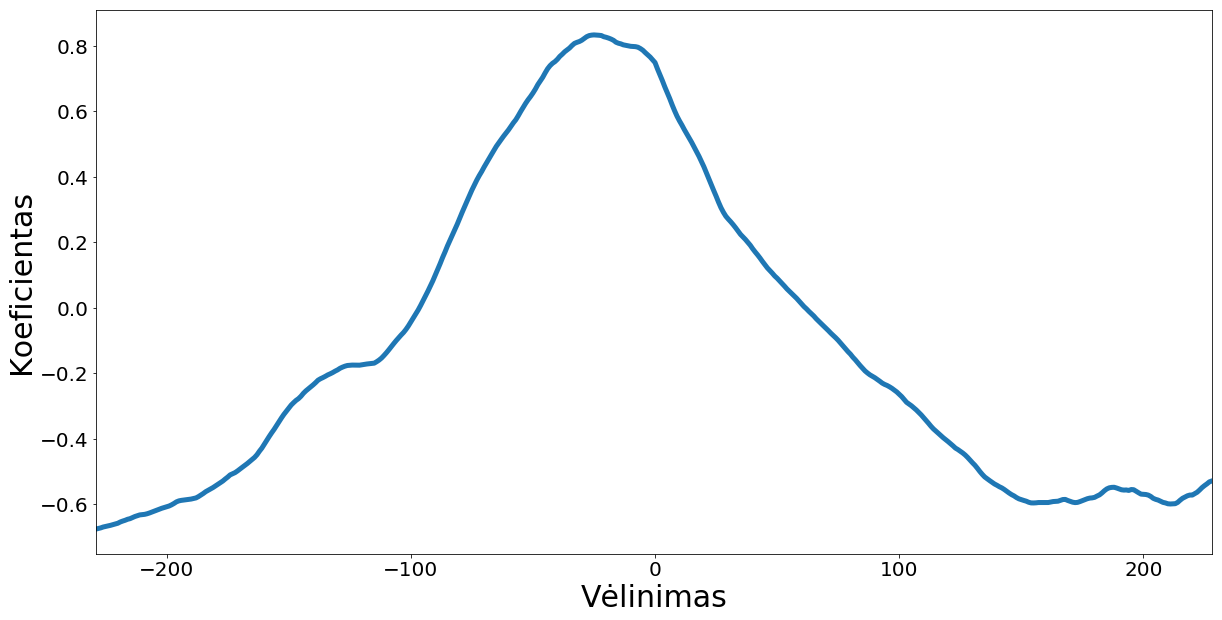

In [614]:
plt.figure(3)
coef_n_delay.plot(x='delay', y='coef', figsize=(20,10), linewidth=5, fontsize=20)
plt.ylabel("Koeficientas",size=30)
plt.xlabel("Vėlinimas",size=30)
plt.legend().remove()


In [330]:
coef_n_delay.loc[coef_n_delay['coef'].idxmax()]

delay   -25.000000
coef      0.832467
Name: 204, dtype: float64

In [332]:
btc_with_noise = btc_df['Open'].tolist()

In [345]:
for i in range(0, len(btc_with_noise), 10):
    btc_with_noise[i] = np.random.randint(200000, size=1)[0]

In [346]:
btc_df['btc_with_noise'] = btc_with_noise

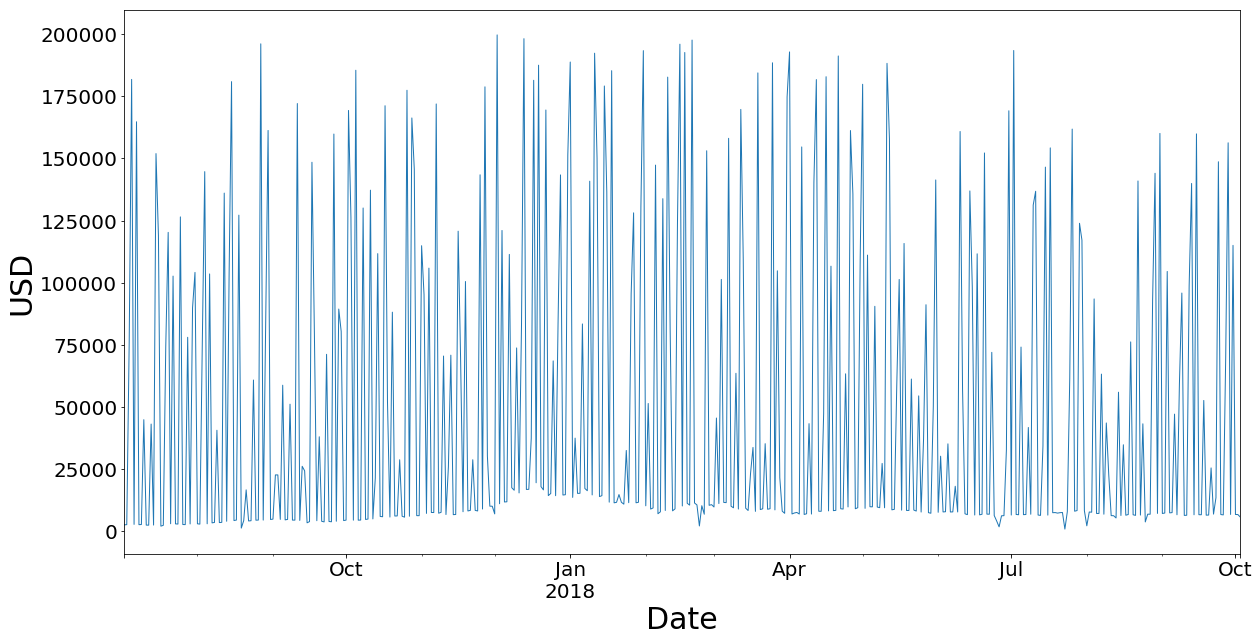

In [617]:
btc_df['btc_with_noise'].plot(figsize=(20,10), linewidth=1, fontsize=20)

plt.ylabel("USD",size=30)
plt.xlabel("Date",size=30)
plt.legend().remove()

In [348]:
x = btc_df['btc_with_noise'].tolist()
y = eth_df['Open'].tolist()
max_delay = int(len(x)/2)
coef_n_delay = pd.DataFrame(columns=['delay', 'coef'])
for delay in range(-max_delay,max_delay):
    coef_n_delay = coef_n_delay.append(
        {'coef': analyse_series(x,y,delay),
          'delay': delay}, 
        ignore_index=True)

<Figure size 432x288 with 0 Axes>

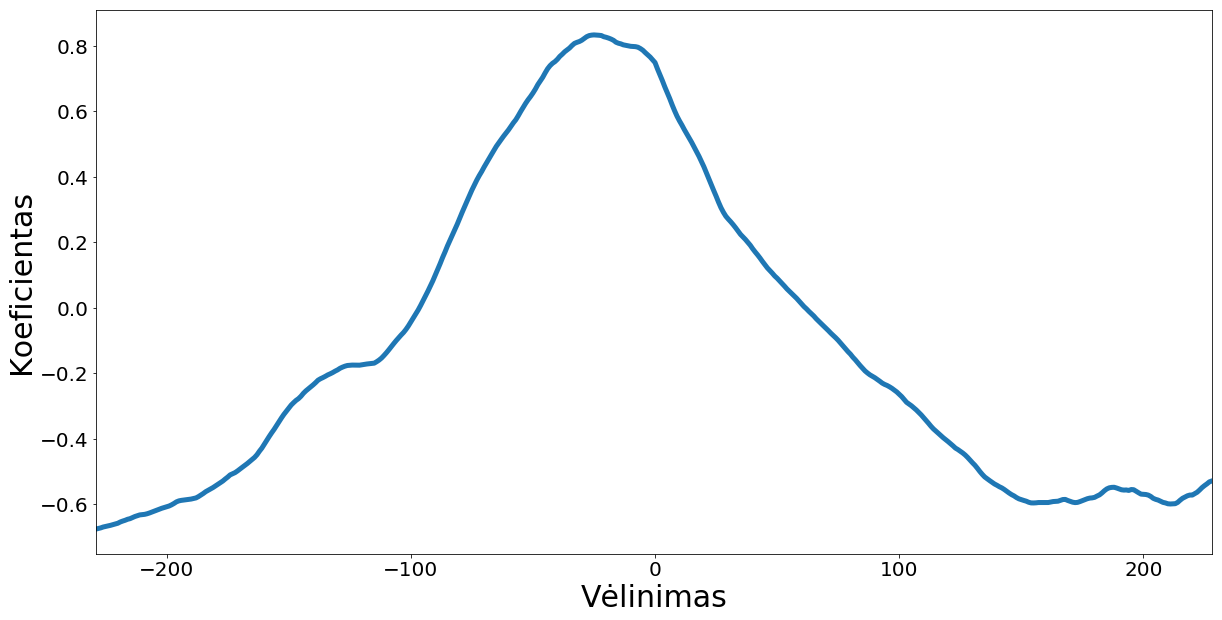

In [618]:
plt.figure(4)
coef_n_delay.plot(x='delay', y='coef', figsize=(20,10), linewidth=5, fontsize=20)
plt.ylabel("Koeficientas",size=30)
plt.xlabel("Vėlinimas",size=30)
plt.legend().remove()

In [361]:
ltc_df = pd.read_csv('Kraken_LTCUSD_d.csv', header=0)
xrp_df = pd.read_csv('Kraken_XRPUSD_d.csv', header=0)
ltc_df.columns = ['Date','Symbol','Open','High','Low','Close','Volume LTC','Volume USD']
xrp_df.columns = ['Date','Symbol','Open','High','Low','Close','Volume XRP','Volume XRP']
ltc_df.Date = pd.to_datetime(ltc_df.Date)
xrp_df.Date = pd.to_datetime(xrp_df.Date)
ltc_df.set_index('Date', inplace=True)
xrp_df.set_index('Date', inplace=True)
ltc_df = ltc_df.loc[ltc_df.index >'2017-06-21']
xrp_df = xrp_df.loc[xrp_df.index >'2017-06-21']



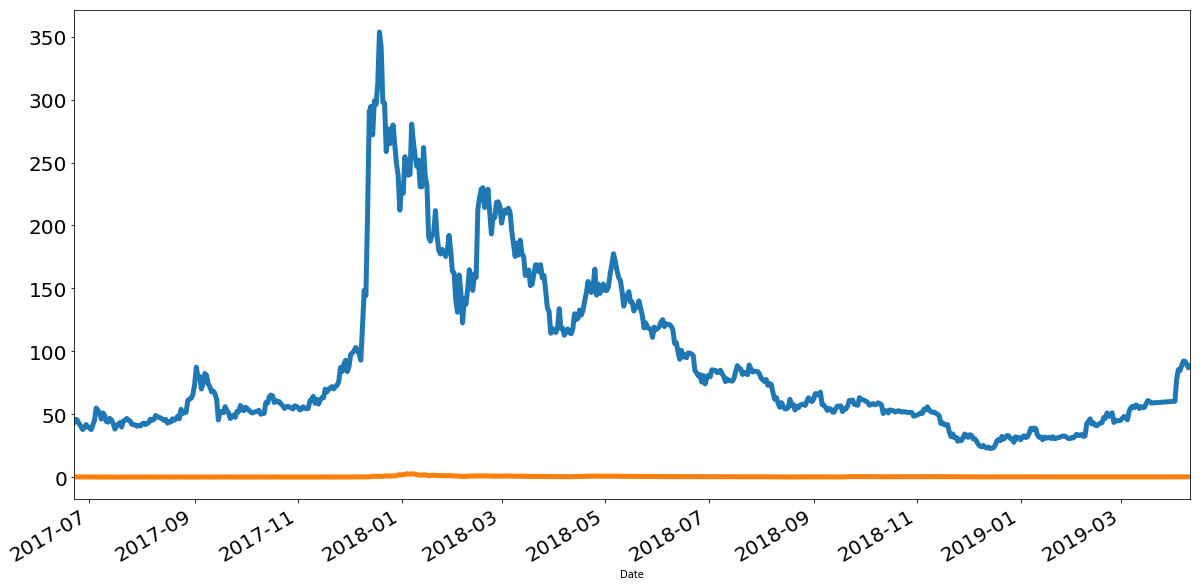

In [362]:
plt.figure(5)
ltc_df['Open'].plot(figsize=(20,10), linewidth=5, fontsize=20)
xrp_df['Open'].plot(figsize=(20,10), linewidth=5, fontsize=20)

Text(0.5, 0, 'Date')

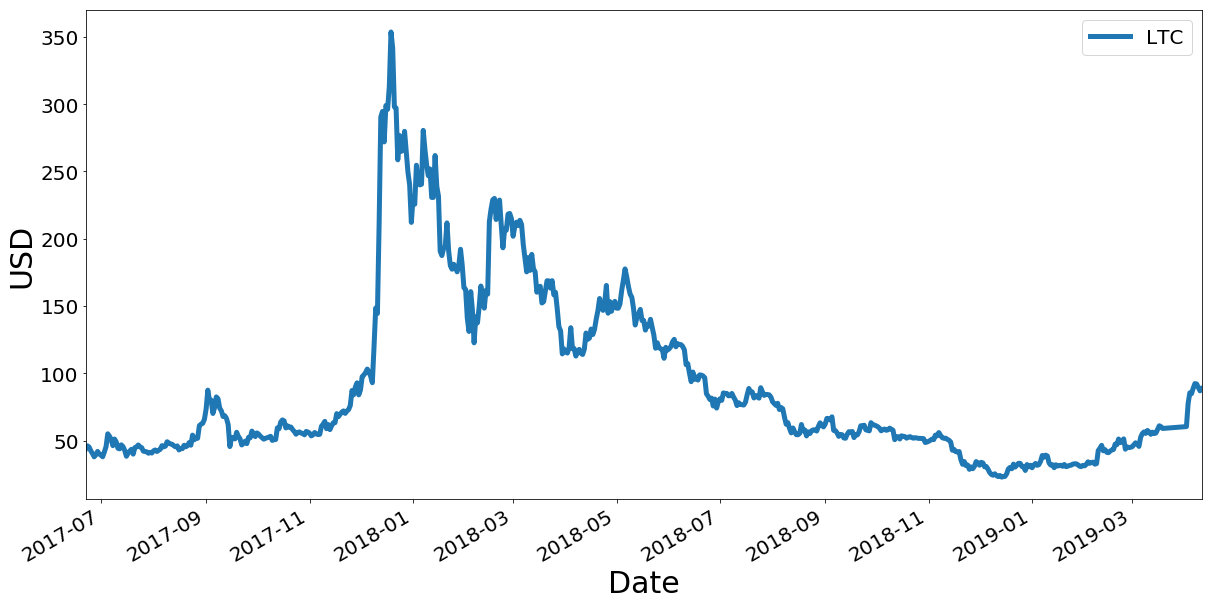

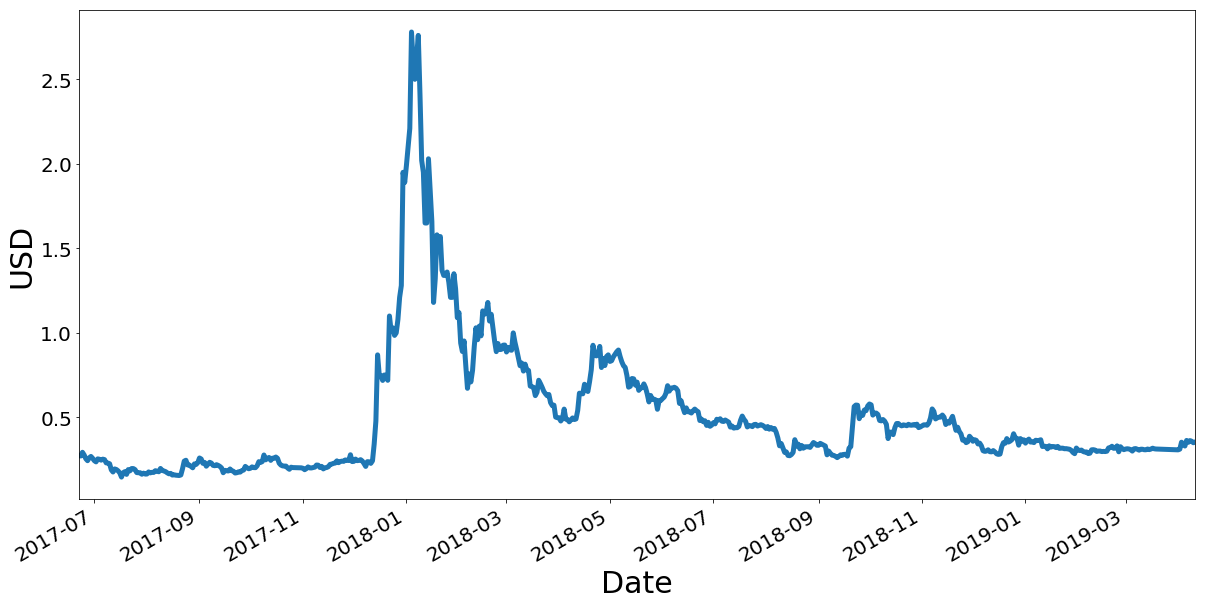

In [620]:
plt.figure(6)
ltc_df['Open'].plot(figsize=(20,10), linewidth=5, fontsize=20,label='LTC')
plt.ylabel("USD",size=30)
plt.xlabel("Date",size=30)
plt.legend(fontsize=20)
plt.figure(7)
xrp_df['Open'].plot(figsize=(20,10), linewidth=5, fontsize=20,label='XRP')
plt.ylabel("USD",size=30)
plt.xlabel("Date",size=30)

delay   -16.000000
coef      0.855585
Name: 307, dtype: float64

<Figure size 432x288 with 0 Axes>

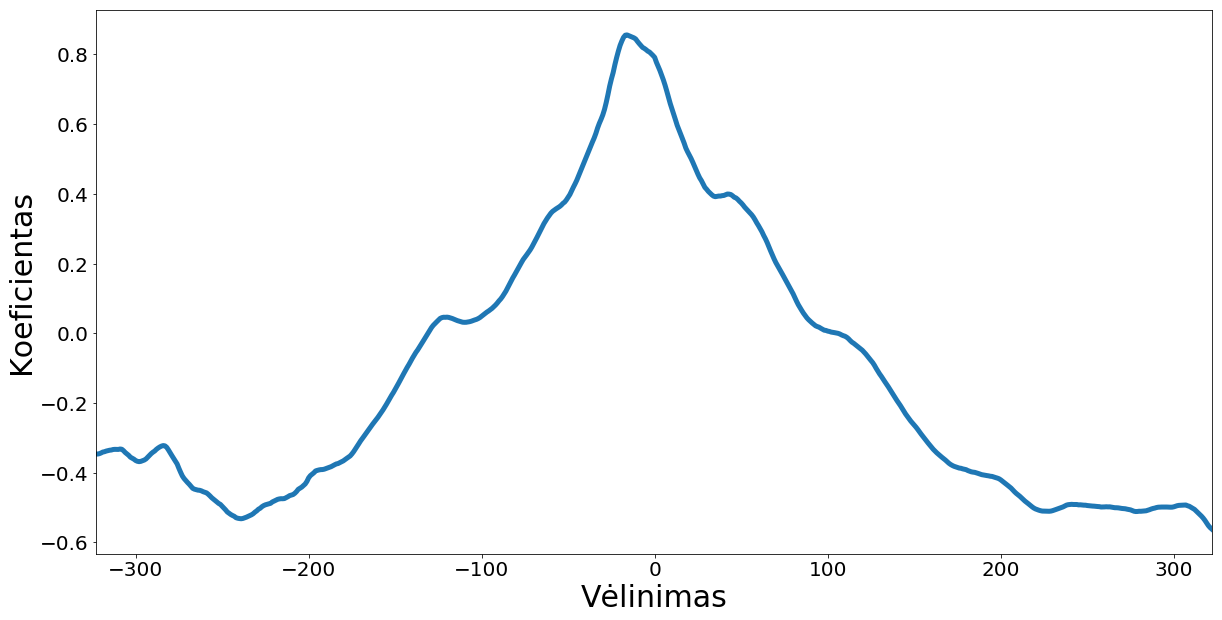

In [622]:
x = ltc_df['Open'].tolist()
y = xrp_df['Open'].tolist()
max_delay = int(len(x)/2)
coef_n_delay = pd.DataFrame(columns=['delay', 'coef'])
for delay in range(-max_delay,max_delay):
    coef_n_delay = coef_n_delay.append(
        {'coef': analyse_series(x,y,delay),
          'delay': delay}, 
        ignore_index=True)
    
plt.figure(7)
coef_n_delay.plot(x='delay', y='coef', figsize=(20,10), linewidth=5, fontsize=20)
plt.ylabel("Koeficientas",size=30)
plt.xlabel("Vėlinimas",size=30)
plt.legend().remove()
coef_n_delay.loc[coef_n_delay['coef'].idxmax()]

In [625]:
currency_exchange_rates = pd.read_csv('daily_csv.csv', header=0)

In [626]:
currency_exchange_rates.Date = pd.to_datetime(currency_exchange_rates.Date)
currency_exchange_rates.set_index('Date', inplace=True)
currency_exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 226533 entries, 1971-01-04 to 2017-12-01
Data columns (total 2 columns):
Country    226533 non-null object
Value      217806 non-null float64
dtypes: float64(1), object(1)
memory usage: 5.2+ MB


In [579]:
nok = currency_exchange_rates.loc[currency_exchange_rates['Country'] == 'Norway']
euro = currency_exchange_rates.loc[currency_exchange_rates['Country'] == 'Euro']
chf = currency_exchange_rates.loc[currency_exchange_rates['Country'] == 'Switzerland']
dok = currency_exchange_rates.loc[currency_exchange_rates['Country'] == 'Denmark']
pound = currency_exchange_rates.loc[currency_exchange_rates['Country'] == 'United Kingdom']
aus_usd = currency_exchange_rates.loc[currency_exchange_rates['Country'] == 'Australia']

In [582]:
nok = nok.loc[(nok.index > '2015-01-01') & (nok.index < '2016-01-01')]
euro = euro.loc[(euro.index > '2015-01-01') & (euro.index < '2016-01-01')]
chf = chf.loc[(chf.index > '2015-01-01') & (chf.index < '2016-01-01')]
dok = dok.loc[(dok.index > '2015-01-01') & (dok.index < '2016-01-01')]
pound = pound.loc[(pound.index > '2015-01-01') & (pound.index < '2016-01-01')]
aus_usd = aus_usd.loc[(aus_usd.index > '2015-01-01') & (aus_usd.index < '2016-01-01')]
nok = nok.dropna()
euro = euro.dropna()
chf = chf.dropna()
dok = dok.dropna()
pound = pound.dropna()
aus_usd = aus_usd.dropna()

<Figure size 432x288 with 0 Axes>

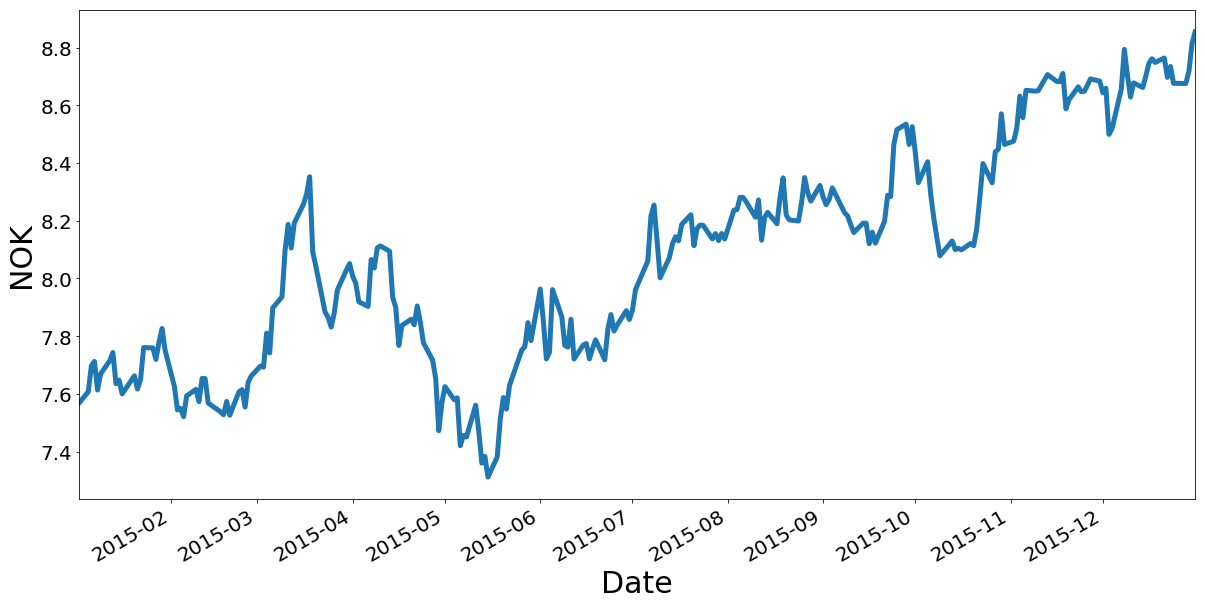

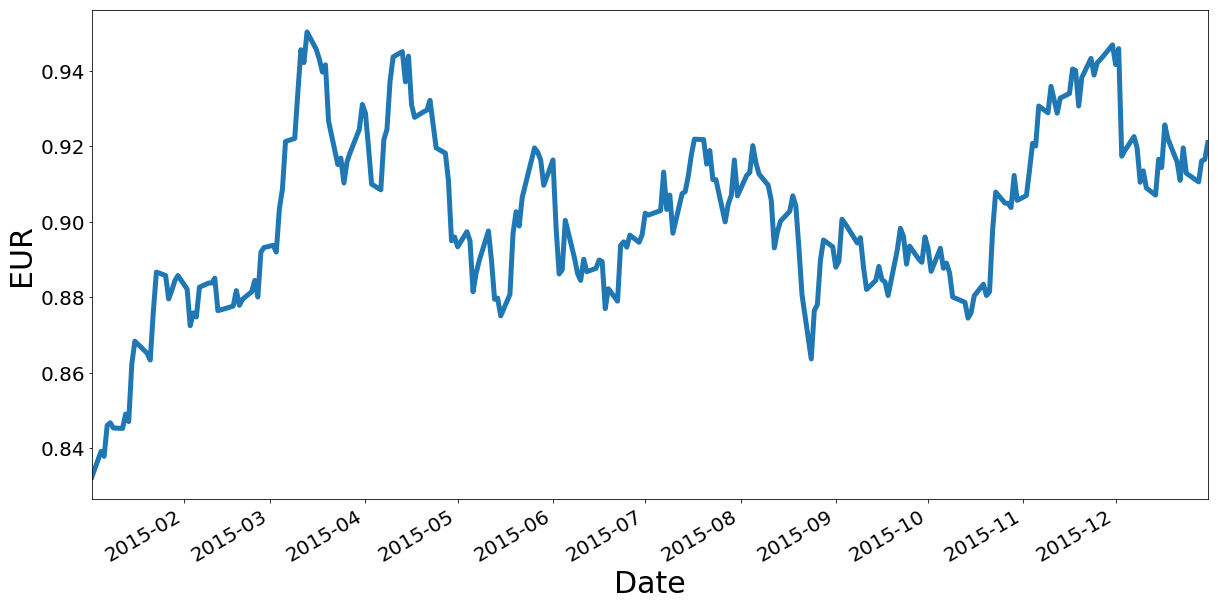

In [627]:
plt.figure(8)
nok.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.ylabel("NOK",size=30)
plt.xlabel("Date",size=30)
plt.legend().remove()
plt.figure(9)
euro.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.ylabel("EUR",size=30)
plt.xlabel("Date",size=30)
plt.legend().remove()

delay    83.000000
coef      0.733162
Name: 208, dtype: float64

<Figure size 432x288 with 0 Axes>

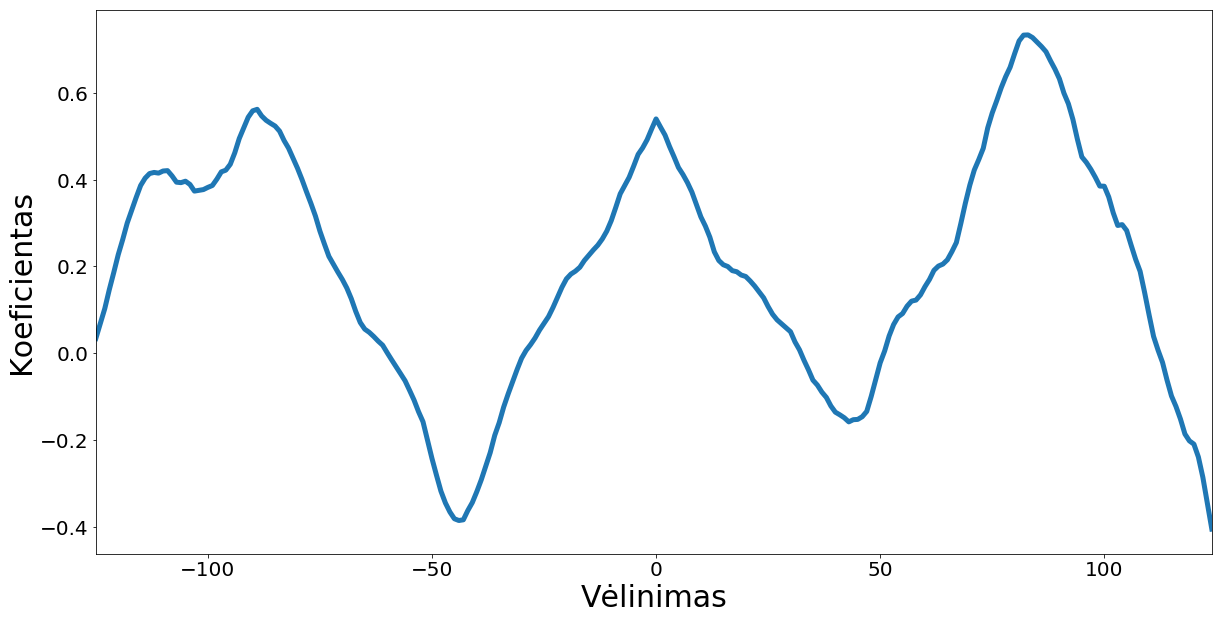

In [628]:
x = nok['Value'].tolist()
y = euro['Value'].tolist()
max_delay = int(len(x)/2)
coef_n_delay = pd.DataFrame(columns=['delay', 'coef'])
for delay in range(-max_delay,max_delay):
    coef_n_delay = coef_n_delay.append(
        {'coef': analyse_series(x,y,delay),
          'delay': delay}, 
        ignore_index=True)
    
plt.figure(10)
coef_n_delay.plot(x='delay', y='coef', figsize=(20,10), linewidth=5, fontsize=20)
plt.ylabel("Koeficientas",size=30)
plt.xlabel("Vėlinimas",size=30)
plt.legend().remove()
coef_n_delay.loc[coef_n_delay['coef'].idxmax()]

<Figure size 432x288 with 0 Axes>

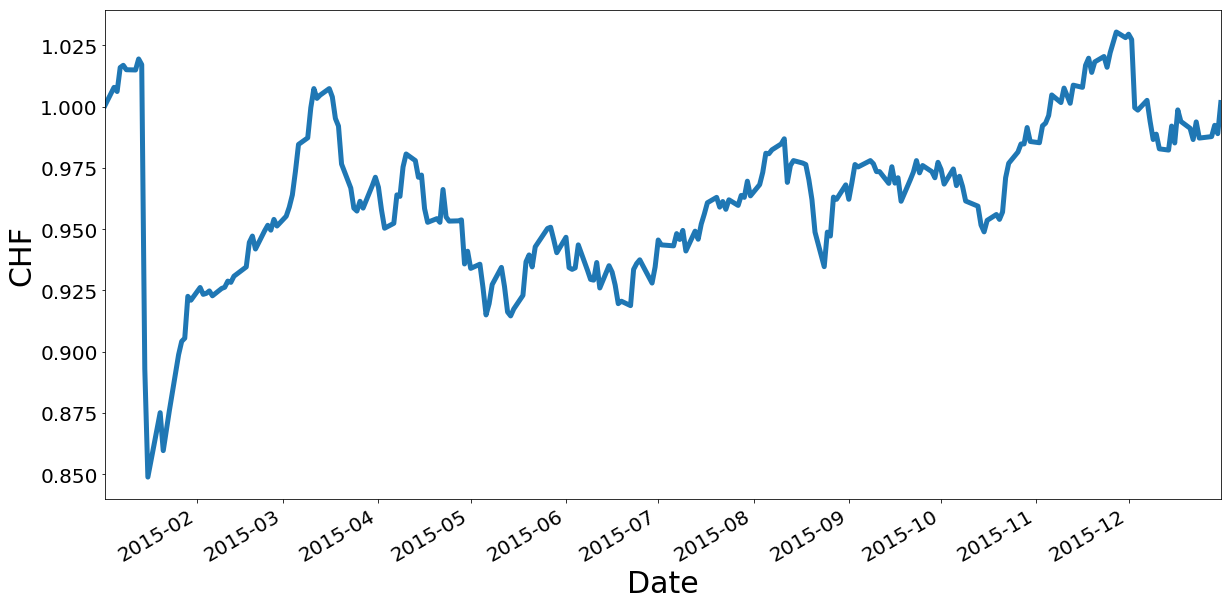

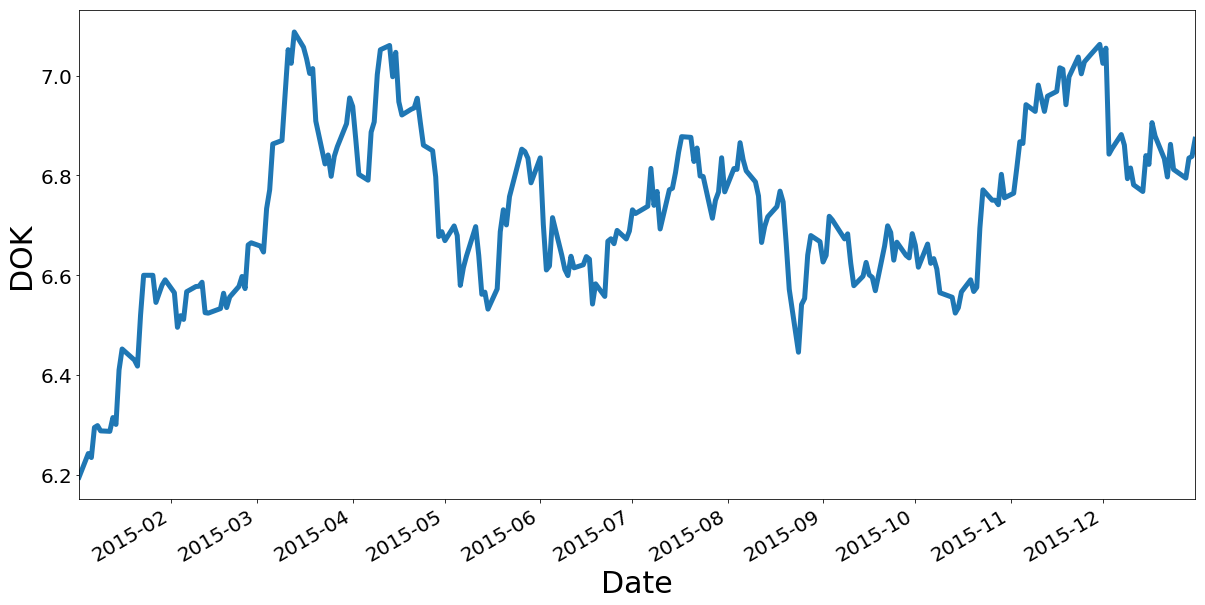

In [629]:
plt.figure(11)
chf.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.ylabel("CHF",size=30)
plt.xlabel("Date",size=30)
plt.legend().remove()
plt.figure(12)
dok.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.ylabel("DOK",size=30)
plt.xlabel("Date",size=30)
plt.legend().remove()

delay   -9.000000
coef     0.505402
Name: 116, dtype: float64

<Figure size 432x288 with 0 Axes>

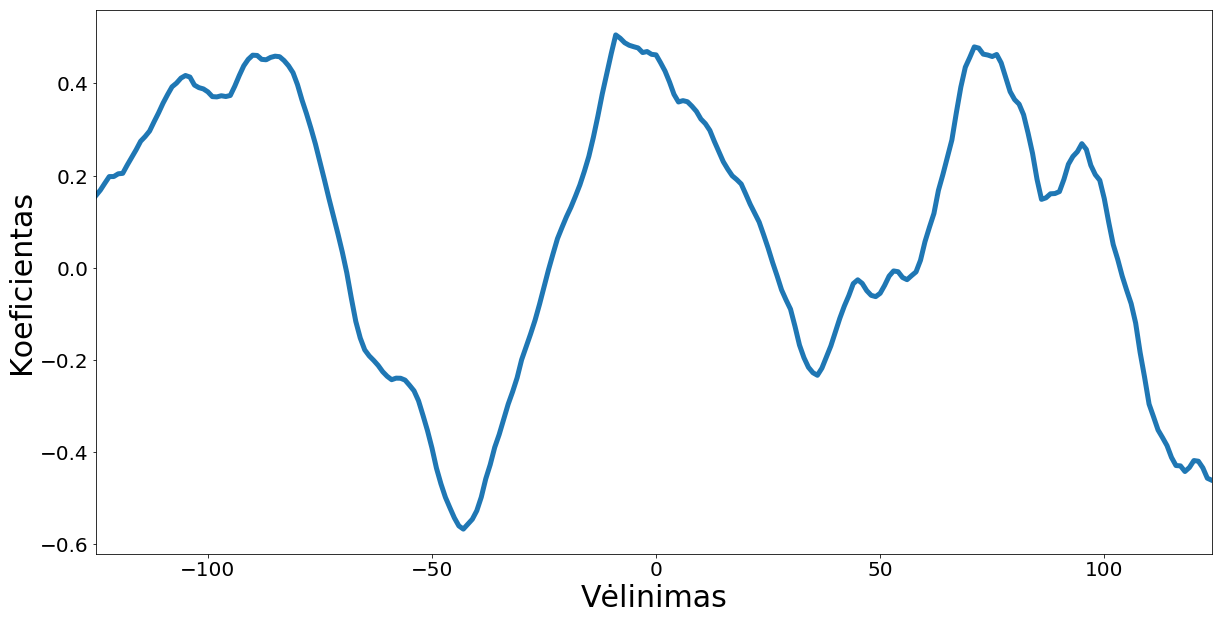

In [630]:
x = chf['Value'].tolist()
y = dok['Value'].tolist()
max_delay = int(len(x)/2)
coef_n_delay = pd.DataFrame(columns=['delay', 'coef'])
for delay in range(-max_delay,max_delay):
    coef_n_delay = coef_n_delay.append(
        {'coef': analyse_series(x,y,delay),
          'delay': delay}, 
        ignore_index=True)
    
plt.figure(13)
coef_n_delay.plot(x='delay', y='coef', figsize=(20,10), linewidth=5, fontsize=20)
plt.ylabel("Koeficientas",size=30)
plt.xlabel("Vėlinimas",size=30)
plt.legend().remove()
coef_n_delay.loc[coef_n_delay['coef'].idxmax()]

<Figure size 432x288 with 0 Axes>

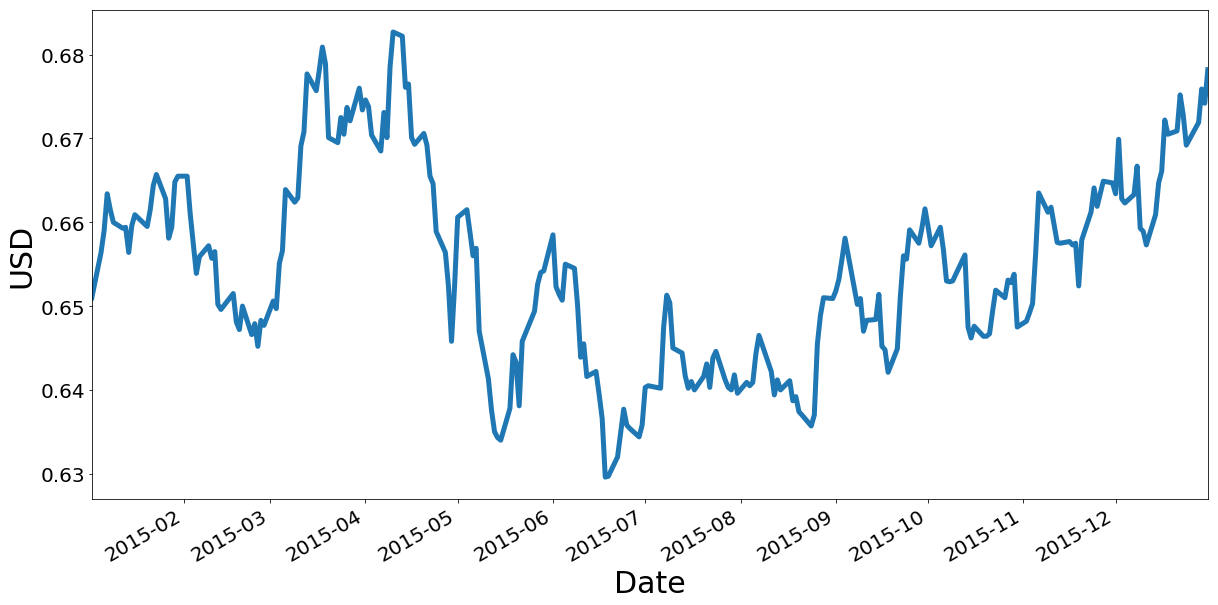

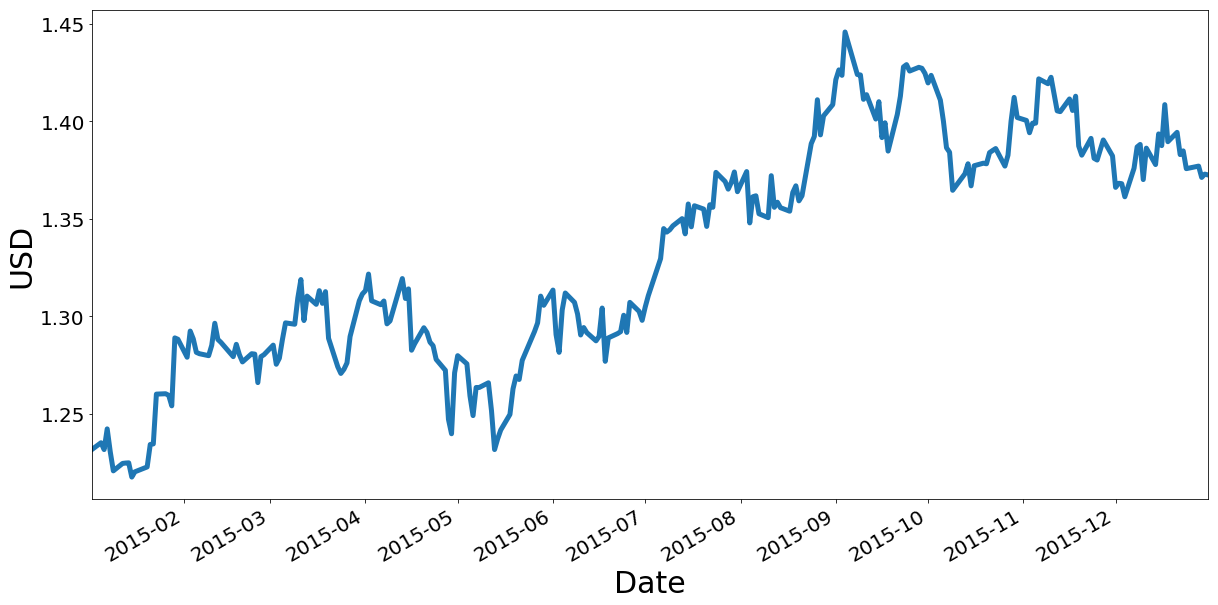

In [633]:
plt.figure(14)
pound.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.ylabel("USD",size=30)
plt.xlabel("Date",size=30)
plt.legend().remove()
plt.figure(15)
aus_usd.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.ylabel("USD",size=30)
plt.xlabel("Date",size=30)
plt.legend().remove()

delay   -81.000000
coef      0.655634
Name: 44, dtype: float64

<Figure size 432x288 with 0 Axes>

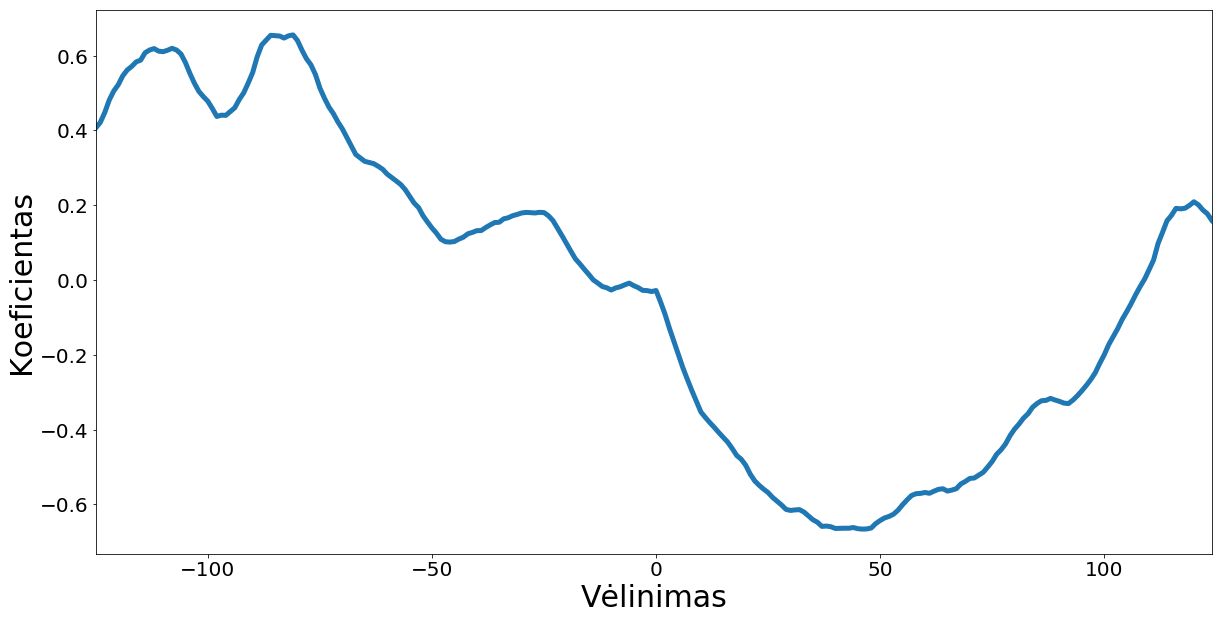

In [632]:
x = pound['Value'].tolist()
y = aus_usd['Value'].tolist()
max_delay = int(len(x)/2)
coef_n_delay = pd.DataFrame(columns=['delay', 'coef'])
for delay in range(-max_delay,max_delay):
    coef_n_delay = coef_n_delay.append(
        {'coef': analyse_series(x,y,delay),
          'delay': delay}, 
        ignore_index=True)
    
plt.figure(13)
coef_n_delay.plot(x='delay', y='coef', figsize=(20,10), linewidth=5, fontsize=20)
plt.ylabel("Koeficientas",size=30)
plt.xlabel("Vėlinimas",size=30)
plt.legend().remove()
coef_n_delay.loc[coef_n_delay['coef'].idxmax()]